Exercise 1
1. Create a repo: simpleplot
2. Clone that repo to your computer.
3. Get three SHP files from the same country (do not use islands or small territories). You should have polygons (i.e. regions).
4. Save the three maps into one geopackage file.

In [1]:
import os, geopandas as gpd

PeruProvincias=gpd.read_file(os.path.join("maps","Provincias", "PROVINCIAS_inei_geogpsperu_suyopomalia.shp"))
PeruDepartamentos=gpd.read_file(os.path.join("maps","Departamentos", "DEPARTAMENTOS_inei_geogpsperu_suyopomalia.shp"))
PeruComunidades=gpd.read_file(os.path.join("maps","Comunidades", "COMUNIDADES CAMPESINA GEOPERU GEOGPSPERU V10.shp"))
PeruSalud=gpd.read_file(os.path.join("maps","Salud", "Establecimientos de Salud CENEPRED SuyoPomalia geogpsperu.shp"))

In [2]:
type(PeruComunidades)
PeruComunidades.shape
PeruComunidades.geometry
PeruDepartamentos.geometry
PeruSalud.geometry

0         POINT (-73.25165 -3.74802)
1        POINT (-76.96372 -12.05389)
2        POINT (-77.08124 -11.99548)
3        POINT (-76.64178 -12.61767)
4        POINT (-70.24627 -18.00657)
                    ...             
16619    POINT (-73.28845 -14.17058)
16620    POINT (-73.51609 -14.79275)
16621    POINT (-73.15136 -13.90142)
16622    POINT (-73.09055 -14.21994)
16623    POINT (-73.55888 -14.75441)
Name: geometry, Length: 16624, dtype: geometry

<Axes: >

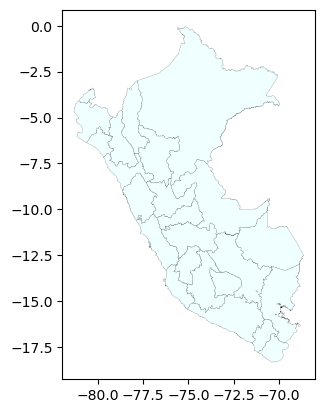

In [3]:
PeruDepartamentos.plot(facecolor="azure", edgecolor="black", linewidth=0.1)

In [4]:
PeruDepartamentos.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
PeruSalud.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

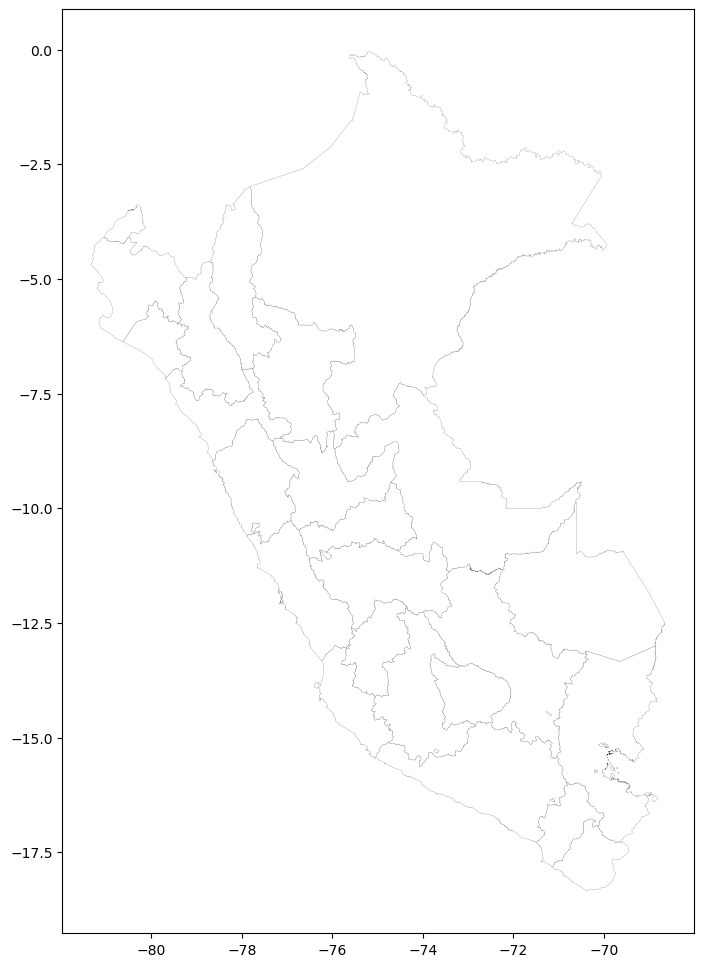

In [6]:
PeruDepartamentos.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

<Axes: >

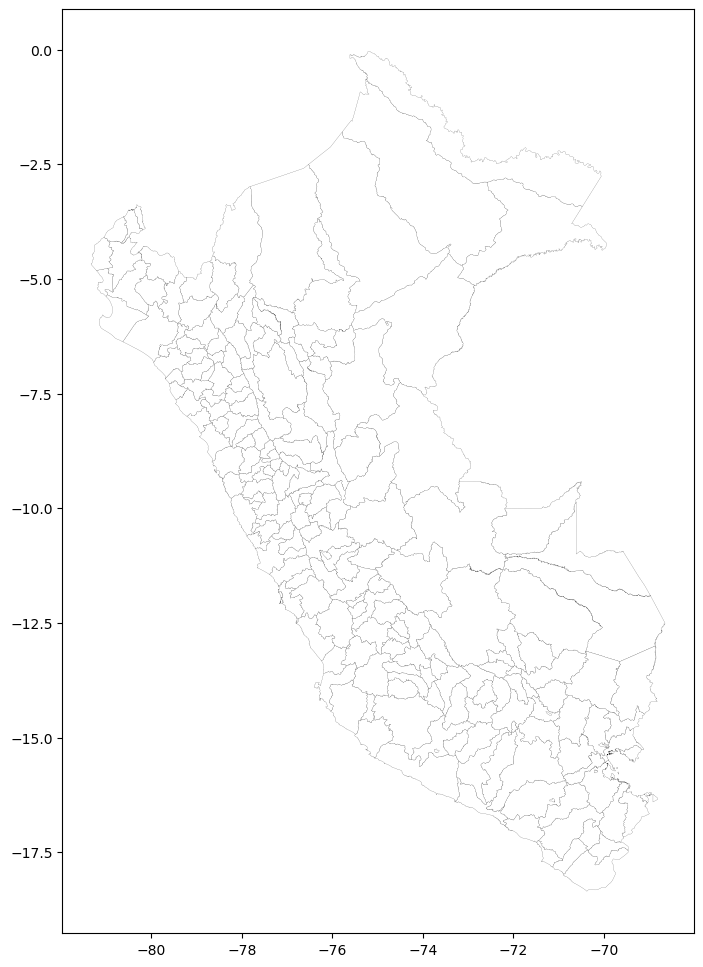

In [7]:
PeruProvincias.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

<Axes: >

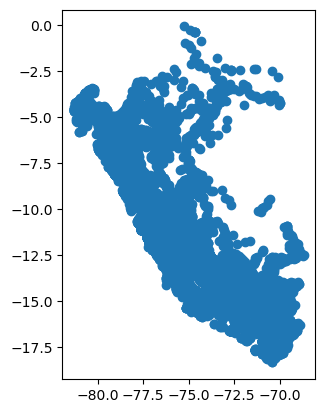

In [8]:
PeruSalud.plot()

<Axes: >

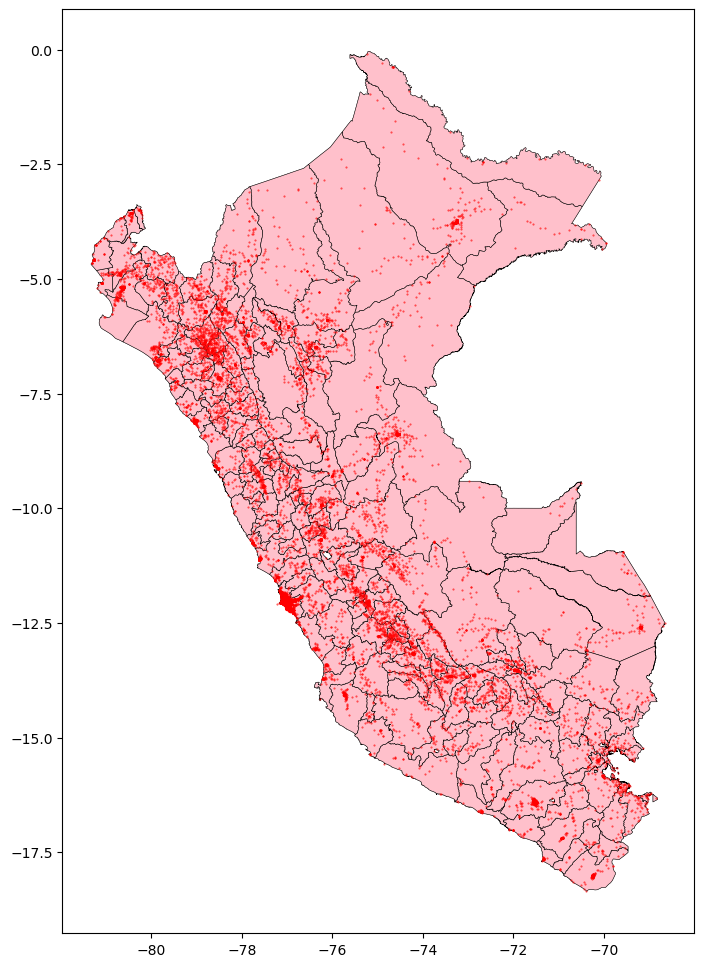

In [9]:
basePeru = PeruDepartamentos.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

PeruProvincias.plot(edgecolor='black', linewidth=0.4,
            ax=basePeru, facecolor="pink")
PeruSalud.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=basePeru)


In [10]:
PeruDepartamentos.to_file(os.path.join("maps","PeruMaps.gpkg"), layer='Departamentos', driver="GPKG")
PeruProvincias.to_file(os.path.join("maps","PeruMaps.gpkg"), layer='Provincias', driver="GPKG")
PeruSalud.to_file(os.path.join("maps","PeruMaps.gpkg"), layer='establecimientos_de_salud', driver="GPKG")

Exercise 2
1. Get more file maps for your country (lower level administrative units).
2. Check all the CRSs of your GDFs.
3. If you find one CRS is missing, fill the CRS with the right projection.
4. If you have unprojected CRS, look for the right one and reset it.

In [11]:
PeruDistritos=gpd.read_file(os.path.join("maps","Distritos", "DISTRITOS_inei_geogpsperu_suyopomalia.shp"))

<Axes: >

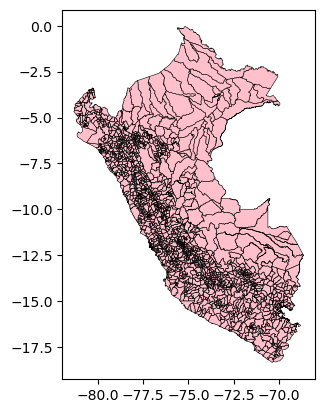

In [12]:
PeruDistritos.plot(edgecolor='black', linewidth=0.4, facecolor="pink")

In [13]:
PeruDistritos.crs==PeruDepartamentos.crs==PeruProvincias.crs==PeruSalud.crs

True

<Axes: >

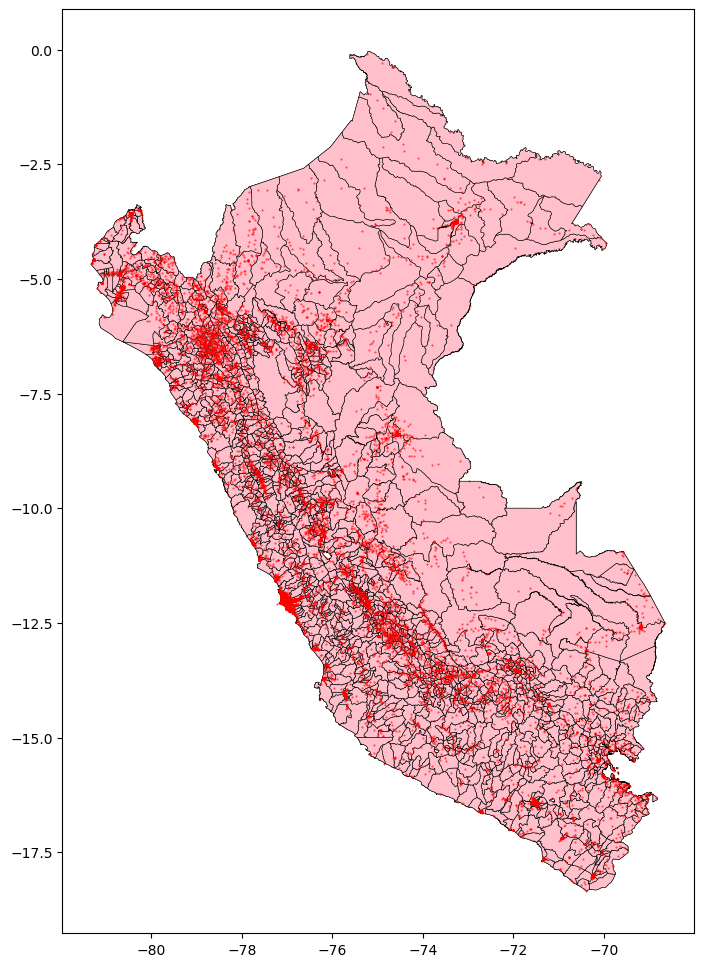

In [14]:
basePeru = PeruDepartamentos.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))
PeruProvincias.plot(edgecolor='black', linewidth=0.4,
            ax=basePeru, facecolor="pink")
PeruDistritos.plot(edgecolor='black', linewidth=0.4, facecolor="pink",
                  ax=basePeru)
PeruSalud.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=basePeru)

In [15]:
PeruDistritos.to_file(os.path.join("maps","PeruMaps.gpkg"), layer='Distritos', driver="GPKG")

In [16]:
#Districts have the same crs, we will try with another one
PeruComunidades.crs

<Projected CRS: EPSG:32717>
Name: WGS 84 / UTM zone 17S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 84°W and 78°W, southern hemisphere between 80°S and equator, onshore and offshore. Ecuador. Peru.
- bounds: (-84.0, -80.0, -78.0, 0.0)
Coordinate Operation:
- name: UTM zone 17S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
PeruComunidades4326 = PeruComunidades.to_crs(4326)

In [18]:
PeruComunidades4326.crs==PeruDepartamentos.crs

True

<Axes: >

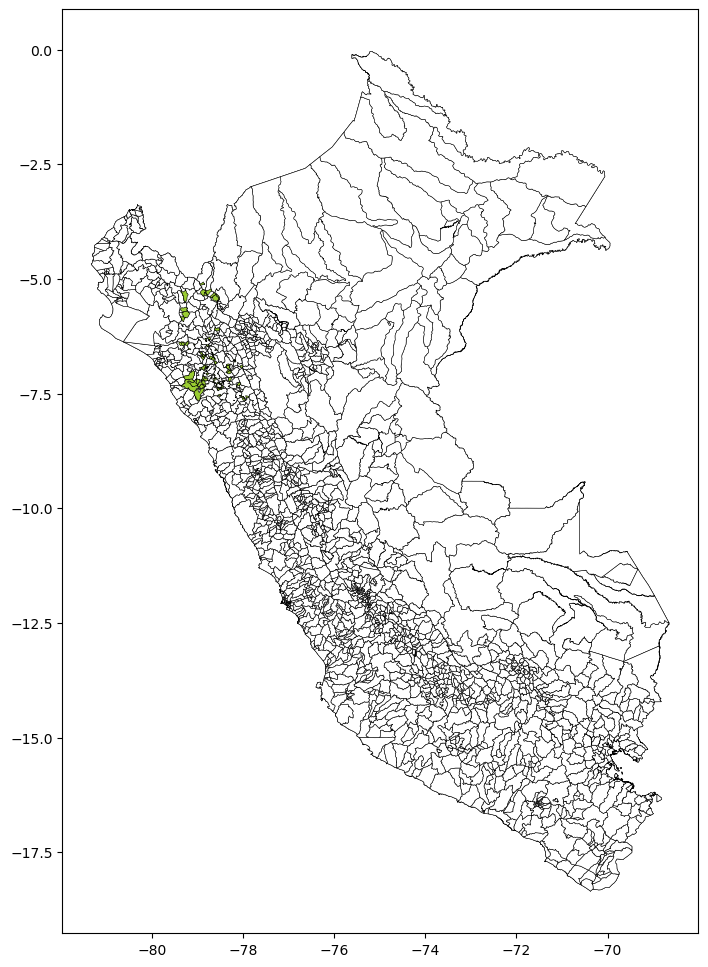

In [19]:
basePeru = PeruDepartamentos.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))
PeruProvincias.plot(edgecolor='black', linewidth=0.4,
            ax=basePeru, facecolor="white")
PeruDistritos.plot(edgecolor='black', linewidth=0.4, facecolor="white",
                  ax=basePeru)
PeruComunidades4326.plot(edgecolor='black', linewidth=0.4,
            ax=basePeru, facecolor="yellowgreen")

In [20]:
PeruComunidades.to_file(os.path.join("maps","PeruMaps.gpkg"), layer='Comunidades_Campesinas', driver="GPKG")

Exercise 3
1. Recover the boundaries of your country GDF (polygon).
2. Turn the boundary into a GDF.

In [21]:
countries=gpd.read_file(os.path.join("maps","World_Countries", "World_Countries.shp"))
Peru=countries[countries.COUNTRY=='Peru']

<Axes: >

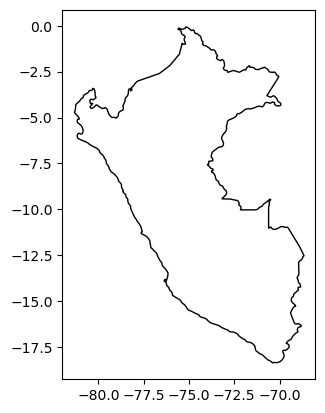

In [22]:
Peru.plot(facecolor="white", edgecolor="black")

In [23]:
Peru.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
Peru.to_file(os.path.join("maps","PeruMaps.gpkg"), layer='Mapa_sin_divisiones', driver="GPKG")

In [25]:
Peru.boundary

172    LINESTRING (-69.56750 -10.95056, -69.56844 -10...
dtype: geometry

<Axes: >

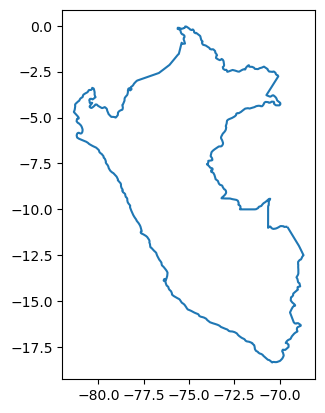

In [26]:
Peru.boundary.plot()

In [27]:
type(Peru.boundary)

geopandas.geoseries.GeoSeries

In [28]:
Peru.boundary.to_frame()

0
172  LINESTRING (-69.56750 -10.95056, -69.56844 -10...

In [29]:
PeruDF=Peru.boundary.to_frame() 

PeruDF['name']='Peru' 

PeruDF.rename(columns={0:'geometry'},inplace=True) 

PeruDF = PeruDF.set_geometry("geometry")

In [30]:
PeruDF

geometry  name
172  LINESTRING (-69.56750 -10.95056, -69.56844 -10...  Peru

In [31]:
PeruDF.to_file(os.path.join("maps","PeruMaps.gpkg"), layer='border', driver="GPKG")

Exercise 4
1. Look for some points in a CSV file about your country.
2. Turn those points into a spatial object.
3. Update the geopackage with the Brazil layers with the layer of points.

In [32]:
import pandas as pd 
airportsperu=pd.read_csv(os.path.join("data","pe-airports.csv"))
airportsperu.iloc[[0,1,2,3,-4,-3,-2,-1],:]

id    ident            type  \
0      6217     SPIM   large_airport   
1      6243     SPZO   large_airport   
2      6233     SPQU  medium_airport   
3      6222     SPJL  medium_airport   
193  351487  PE-0013        heliport   
194  351489  PE-0015        heliport   
195  351491  PE-0017        heliport   
196  351492  PE-0018        heliport   

                                               name  latitude_deg  \
0                Jorge Chávez International Airport    -12.021900   
1    Alejandro Velasco Astete International Airport    -13.535700   
2            Rodríguez Ballón International Airport    -16.341101   
3            Inca Manco Capac International Airport    -15.467100   
193                     Pucallpa Air Force Heliport     -8.351500   
194                         Puerto Anapati Heliport    -11.928590   
195                           Puerto Ocopa Heliport    -11.147930   
196                                Tanquin Heliport    -12.126320   

     longitude_deg  elevation_ft continent country_name iso_country  ...  \
0       -77.114305         113.0        SA         Peru          PE  ...   
1       -71.938797       10860.0        SA         Peru          PE  ...   
2       -71.583099        8405.0        SA         Peru          PE  ...   
3       -70.158203       12552.0        SA         Peru          PE  ...   
193     -74.581900         505.0        SA         Peru          PE  ...   
194     -73.987700        1496.0        SA         Peru          PE  ...   
195     -74.306290        1056.0        SA         Peru          PE  ...   
196     -74.075990        1880.0        SA         Peru          PE  ...   

       municipality scheduled_service gps_code iata_code  local_code  \
0              Lima                 1     SPJC       LIM         NaN   
1             Cusco                 1     SPZO       CUZ         NaN   
2          Arequipa                 1     SPQU       AQP         NaN   
3           Juliaca                 1     SPJL       JUL         NaN   
193        Pucallpa                 0      NaN       NaN         NaN   
194  Puerto Anapati                 0      NaN       NaN         NaN   
195    Puerto Ocopa                 0      NaN       NaN         NaN   
196         Tanquin                 0      NaN       NaN         NaN   

                     home_link  \
0       http://www.lap.com.pe/   
1    http://www.corpac.gob.pe/   
2                          NaN   
3                          NaN   
193                        NaN   
194                        NaN   
195                        NaN   
196                        NaN   

                                        wikipedia_link    keywords score  \
0    https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...  SPIM, SPJC  1050   
1    https://en.wikipedia.org/wiki/Alejandro_Velasc...         NaN  1000   
2    https://en.wikipedia.org/wiki/Rodriguez_Ballon...         NaN   750   
3    https://en.wikipedia.org/wiki/Inca_Manco_Capac...         NaN   750   
193                                                NaN         NaN     0   
194                                                NaN         NaN     0   
195                                                NaN         NaN     0   
196                                                NaN         NaN     0   

                  last_updated  
0    2021-05-03T09:18:25+00:00  
1    2010-09-07T09:49:15+00:00  
2    2010-09-07T09:47:49+00:00  
3    2008-07-21T16:57:31+00:00  
193  2022-01-15T01:32:29+00:00  
194  2022-01-15T01:37:03+00:00  
195  2022-01-15T01:40:40+00:00  
196  2022-01-15T01:42:05+00:00  

[8 rows x 23 columns]

In [33]:
airportsperu.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [34]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
airportsperu=airportsperu.loc[:,keep]

In [35]:
airportsperu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           197 non-null    object 
 1   type           197 non-null    object 
 2   latitude_deg   197 non-null    float64
 3   longitude_deg  197 non-null    float64
 4   elevation_ft   185 non-null    float64
 5   region_name    197 non-null    object 
 6   municipality   192 non-null    object 
dtypes: float64(3), object(4)
memory usage: 10.9+ KB


In [36]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
airportsperu[numericCols]=airportsperu.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))
airportsperu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           197 non-null    object 
 1   type           197 non-null    object 
 2   latitude_deg   197 non-null    float64
 3   longitude_deg  197 non-null    float64
 4   elevation_ft   185 non-null    float64
 5   region_name    197 non-null    object 
 6   municipality   192 non-null    object 
dtypes: float64(3), object(4)
memory usage: 10.9+ KB


In [37]:
aeropuertosperu=gpd.GeoDataFrame(data=airportsperu.copy(),
                 geometry=gpd.points_from_xy(airportsperu.longitude_deg,
                                             airportsperu.latitude_deg), 
                 crs=Peru.crs.to_epsg())

<Axes: >

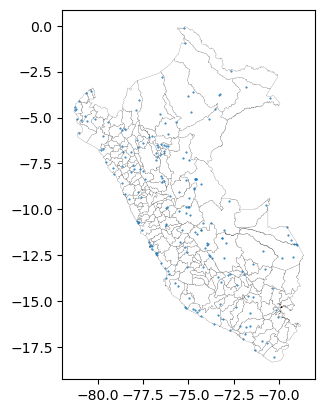

In [38]:
base = PeruProvincias.plot(color='white', edgecolor='black', linewidth=0.1, facecolor="pink")
aeropuertosperu.plot(ax=base, marker=".", markersize=1)

In [39]:
aeropuertosperu.rename(columns={'type':'kind'},inplace=True)
aeropuertosperu

name            kind  \
0                Jorge Chávez International Airport   large_airport   
1    Alejandro Velasco Astete International Airport   large_airport   
2            Rodríguez Ballón International Airport  medium_airport   
3            Inca Manco Capac International Airport  medium_airport   
4                       Maria Reiche Neuman Airport  medium_airport   
..                                              ...             ...   
192                                  Aldora Airport          closed   
193                     Pucallpa Air Force Heliport        heliport   
194                         Puerto Anapati Heliport        heliport   
195                           Puerto Ocopa Heliport        heliport   
196                                Tanquin Heliport        heliport   

     latitude_deg  longitude_deg  elevation_ft      region_name  \
0      -12.021900     -77.114305         113.0      Lima Region   
1      -13.535700     -71.938797       10860.0     Cuzco Region   
2      -16.341101     -71.583099        8405.0  Arequipa Region   
3      -15.467100     -70.158203       12552.0      Puno Region   
4      -14.854000     -74.961502        1860.0       Ica Region   
..            ...            ...           ...              ...   
192     -5.151760     -80.947370           NaN     Piura Region   
193     -8.351500     -74.581900         505.0   Ucayali Region   
194    -11.928590     -73.987700        1496.0     Junín Region   
195    -11.147930     -74.306290        1056.0     Junín Region   
196    -12.126320     -74.075990        1880.0     Junín Region   

       municipality                     geometry  
0              Lima  POINT (-77.11431 -12.02190)  
1             Cusco  POINT (-71.93880 -13.53570)  
2          Arequipa  POINT (-71.58310 -16.34110)  
3           Juliaca  POINT (-70.15820 -15.46710)  
4             Nazca  POINT (-74.96150 -14.85400)  
..              ...                          ...  
192           Paita   POINT (-80.94737 -5.15176)  
193        Pucallpa   POINT (-74.58190 -8.35150)  
194  Puerto Anapati  POINT (-73.98770 -11.92859)  
195    Puerto Ocopa  POINT (-74.30629 -11.14793)  
196         Tanquin  POINT (-74.07599 -12.12632)  

[197 rows x 8 columns]

In [40]:
aeropuertosperu.to_file(os.path.join("maps","PeruMaps.gpkg"), layer='airports', driver="GPKG")

Exercise 5

1. Check if all your polygons are valid in every map you have (map of polygons only).
    
2. If you detect some invalid geometries, detect what the problem is.
    
3. Correct all cases. Do not save the results.

In [44]:
PeruDepartamentos[~PeruDepartamentos.is_valid]

Empty GeoDataFrame
Columns: [OBJECTID, CCDD, NOMBDEP, FUENTE, FUENTE_1, POB_PROYEC, POBTOTAL, POB_EDAD_T, POB_EDAD_1, POB_EDAD_E, POB_EDAD_2, DENSIDAD, POBMASCU, POBFEMEN, POBMASCU_P, POBFEMEN_P, R_MASCULIN, POBURBANA, POBRURAL, POBURBANA_, POBRURAL_P, EDAD_PROME, EDAD_MEDIA, POB_0_14, POB_0_14_P, POB_15_29, POB_15_29_, POB_30_59, POB_30_59_, POB_60_MAS, POB_60_M_1, POB_ANALFA, POB_ANAL_1, HOMBRES_AN, HOMBRES__1, MUJERES_AN, MUJERES__1, MUJERES_ED, MUJERES__2, TOTAL_MADR, MADRES_SOL, MADRES_S_1, MUJERES_AD, MADRES_ADO, MADRES_A_1, AL_MENOS_1, AL_MENOS_2, SIN_DISCAP, SIN_DISC_1, ALGUNA_NBI, NBI_PORC, VIV_PARTIC, VIV_PART_1, VIV_PART_2, HOGARES, Shape_Leng, Shape_Area, IC_INF, IC_SUP, UBIC_POBMO, TOTAL_DEFU, TOTAL_DE_1, TOTAL_DE_2, NAC_BAJOPE, NAC_BAJO_1, MUJERES_NA, MUJERES__3, HOMBRES_NA, HOMBRES__2, TOTAL_NACI, IND_121951, IND_122042, IND_122047, IND_516462, IND_516484, Shape_Le_1, Shape_Ar_1, Shape_Le_2, Shape_Ar_2, geometry]
Index: []

[0 rows x 80 columns]

ValueError: aspect must be finite and positive 

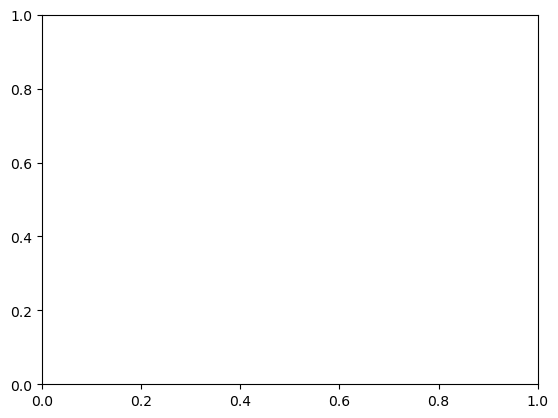

In [42]:
PeruDepartamentos[~PeruDepartamentos.is_valid].plot()

vemos que no hay polígonos inválidos, probemos con otras unidades

In [45]:
PeruProvincias[~PeruProvincias.is_valid]

OBJECTID NOMBDEP IDPROV CCPP CCDD  NOMBPROV          FUENTE  POB_PROYEC  \
144     145.0  LORETO   1608   08   16  PUTUMAYO  INEI - CPV2017      9174.0   

     POBTOTAL  POB_EDAD_T  ...  IND_121951   IND_122042   IND_122047  \
144    9093.0      5769.0  ...       118.0  10351.80157  13196.85035   

     IND_516462  IND_516484  Shape_Leng  Shape_Area  Shape_Le_1  Shape_Ar_1  \
144    297000.0      1810.0         0.0         0.0   20.445171    3.725426   

                                              geometry  
144  POLYGON ((-74.88735 -0.91963, -74.88810 -0.919...  

[1 rows x 80 columns]

<Axes: >

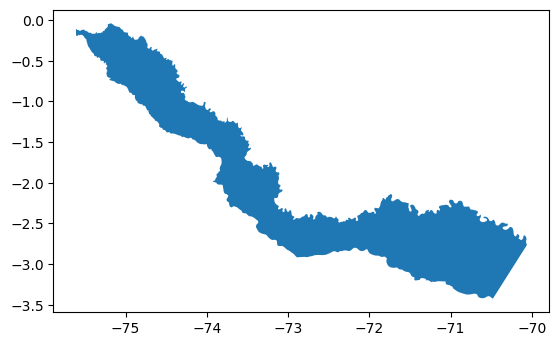

In [46]:
#Hay una inválida
PeruProvincias[~PeruProvincias.is_valid].plot()

In [48]:
from shapely.validation import explain_validity, make_valid

explain_validity(PeruProvincias[~PeruProvincias.is_valid].geometry)

144    Ring Self-intersection[-74.887345766 -0.919629...
Name: geometry, dtype: object

In [49]:
PeruProvincias_valid=PeruProvincias[~PeruProvincias.is_valid].copy()

# solving the issue:
PeruProvincias_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in PeruProvincias_valid['geometry']]

In [50]:
PeruProvincias_valid[~PeruProvincias_valid.is_valid]

Empty GeoDataFrame
Columns: [OBJECTID, NOMBDEP, IDPROV, CCPP, CCDD, NOMBPROV, FUENTE, POB_PROYEC, POBTOTAL, POB_EDAD_T, POB_EDAD_1, POB_EDAD_E, POB_EDAD_2, DENSIDAD, POBMASCU, POBFEMEN, POBMASCU_P, POBFEMEN_P, R_MASCULIN, POBURBANA, POBRURAL, POBURBANA_, POBRURAL_P, EDAD_PROME, EDAD_MEDIA, POB_0_14, POB_0_14_P, POB_15_29, POB_15_29_, POB_30_59, POB_30_59_, POB_60_MAS, POB_60_M_1, POB_ANALFA, POB_ANAL_1, HOMBRES_AN, HOMBRES__1, MUJERES_AN, MUJERES__1, MUJERES_ED, MUJERES__2, TOTAL_MADR, MADRES_SOL, MADRES_S_1, MUJERES_AD, MADRES_ADO, MADRES_A_1, AL_MENOS_1, AL_MENOS_2, SIN_DISCAP, SIN_DISC_1, ALGUNA_NBI, NBI_PORC, VIV_PARTIC, VIV_PART_1, VIV_PART_2, HOGARES, IC_INF, IC_SUP, UBIC_POBMO, TOTAL_DEFU, TOTAL_DE_1, TOTAL_DE_2, NAC_BAJOPE, NAC_BAJO_1, MUJERES_NA, MUJERES__3, HOMBRES_NA, HOMBRES__2, TOTAL_NACI, IND_121951, IND_122042, IND_122047, IND_516462, IND_516484, Shape_Leng, Shape_Area, Shape_Le_1, Shape_Ar_1, geometry]
Index: []

[0 rows x 80 columns]

In [51]:
#Veamos con los distritos
PeruDistritos[~PeruDistritos.is_valid]

Empty GeoDataFrame
Columns: [UBIGEO, OBJECTID, NOMBDEP, NOMBPROV, NOMBDIST, CAPITAL, POBTOTAL, POB_EDAD_T, POB_EDAD_E, DENSIDAD, POBMASCU, POBFEMEN, POBMASCU_P, POBFEMEN_P, R_MASCULIN, POBURBANA, POBRURAL, POBURBANA_, POBRURAL_P, EDAD_PROME, POB_0_14, POB_15_29, POB_30_59, POB_60_MAS, VIV_PARTIC, VIV_PART_1, HOGARES, Shape_Leng, Shape_Area, DIRECCION, POB_PROYEC, POB_EDAD_1, POB_EDAD_2, EDAD_MEDIA, POB_0_14_P, POB_15_29_, POB_30_59_, POB_60_M_1, POB_ANALFA, POB_ANAL_1, HOMBRES_AN, HOMBRES__1, MUJERES_AN, MUJERES__1, MUJERES_ED, MUJERES__2, TOTAL_MADR, MADRES_SOL, MADRES_S_1, MUJERES_AD, MADRES_ADO, MADRES_A_1, AL_MENOS_1, AL_MENOS_2, SIN_DISCAP, SIN_DISC_1, ALGUNA_NBI, NBI_PORC, VIV_PART_2, IC_INF, IC_SUP, UBIC_POBMO, TOTAL_DEFU, TOTAL_DE_1, TOTAL_DE_2, NAC_BAJOPE, NAC_BAJO_1, MUJERES_NA, MUJERES__3, HOMBRES_NA, HOMBRES__2, TOTAL_NACI, IND_121951, IND_122042, IND_122047, IND_516462, IND_516484, geometry]
Index: []

[0 rows x 78 columns]

In [52]:
#Ahora con comunidades
PeruComunidades[~PeruComunidades.is_valid]

Cod_depart    Departo Cod_provin  Provincia Cod_distri   Distrito  \
78         06  Cajamarca       0607  Hualgayoc     060703  Hualgayoc   

   Nomb_CCcc     NumResol FechaCreac Condicion  AreaLegal  NumFamilia  \
78  El Tingo  R.S.61-1956   27/10/56  Titulada    3900.75       106.0   

    Area_ha Comentario                                           CONTACTO  \
78  3995.02        NaN  juan.suyo@geogpsperu.com - WA: 931381206 - www...   

                                             geometry  
78  POLYGON ((761502.043 9253403.731, 761718.931 9...

<Axes: >

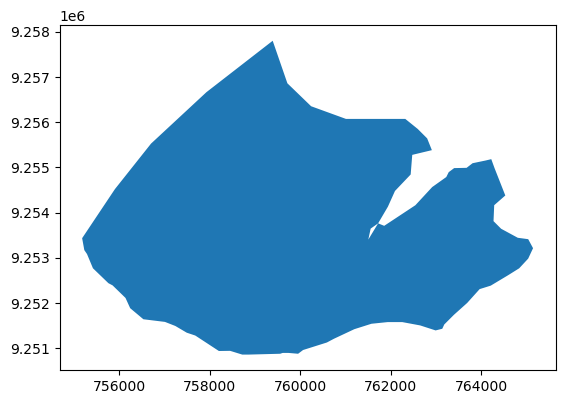

In [53]:
#Tenemos una comunidad no válida (El Tingo)
PeruComunidades[~PeruComunidades.is_valid].plot()

In [54]:
explain_validity(PeruComunidades[~PeruComunidades.is_valid].geometry)

78    Ring Self-intersection[761718.9314 9253762.9533]
Name: geometry, dtype: object

In [55]:
PeruComunidades_valid=PeruComunidades[~PeruComunidades.is_valid].copy()

# solving the issue:
PeruComunidades_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in PeruComunidades_valid['geometry']]

In [56]:
PeruComunidades_valid[~PeruComunidades_valid.is_valid]

Empty GeoDataFrame
Columns: [Cod_depart, Departo, Cod_provin, Provincia, Cod_distri, Distrito, Nomb_CCcc, NumResol, FechaCreac, Condicion, AreaLegal, NumFamilia, Area_ha, Comentario, CONTACTO, geometry]
Index: []

Ya está todo solucionado